In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
X = X.iloc[:, :-2]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


# Dokładność oceny modelu vs wielkość zbioru testowego.

Zwizualizuj dokładność oceny jakości modelu w zależności od wielkości zbioru testowego.

1. Opracuj scenariusz eksperymentu.
2. Zaimplementuj realizację obliczeń potrzebnych do prezentacji wyników eksperymentu.
3. Zaprezentuj wyniki dobierając odpowiednie wizualizacje.
4. Odpowiedz na pytanie: w jakim przedziale na 90% znajduje się prawdziwa wartość metryki przy zbiorze testowym wielkości rzędu 1-2 tys. obserwacji oraz przy największym rozważanym przez Ciebie zbiorze testowym. Oprzyj obliczenie na kwantylach z otrzymanych zestawów wyników dla danej wielkości zbioru.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
def generate_scores(X, y, test_size, num_trials):
    scores = []
    for _ in range(num_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(r2_score(y_test, y_pred))
    return scores

In [6]:
test_size = 1000
num_trials = 10

generate_scores(X, y, test_size, num_trials)

[0.5476977823309088,
 0.5452865959864496,
 0.5023420333690747,
 0.5592429733998259,
 0.523582684202074,
 0.5085515750170669,
 0.5478663720886736,
 0.5591938858927736,
 0.453961700344522,
 0.49035219609348946]

In [7]:
test_sizes = np.arange(2000, X.shape[0], 2000)
test_sizes

array([ 2000,  4000,  6000,  8000, 10000, 12000, 14000, 16000, 18000,
       20000])

In [8]:
scores = []
for test_size in test_sizes:
    scores.append(generate_scores(X, y, test_size, num_trials))

scores

[[0.5339523181421661,
  0.5379546704466385,
  0.5387752076222492,
  0.5196436073794977,
  0.5551860720062858,
  0.5114233733909974,
  0.4931485435476043,
  0.562131380115561,
  0.5007175150560766,
  0.5513557915080924],
 [0.5021170008687323,
  0.5382125045893416,
  0.5055296189690082,
  0.5378513110809149,
  0.49922612279015843,
  0.5507329449517225,
  0.536084027529147,
  0.5299115599188888,
  0.5515231835351104,
  0.5538591002551588],
 [0.5438853667652053,
  0.5452932165117245,
  0.5472783580172536,
  0.5472522643293156,
  0.5169786702505275,
  0.5526425910574657,
  0.5341234752342374,
  0.5454149087320765,
  0.5325552740777661,
  0.5225568191808108],
 [0.5158115248743451,
  0.541338612452573,
  0.5245597905202459,
  -1.5470000027000657,
  0.5266968665551517,
  0.5322796540754295,
  0.5237275976374565,
  0.5440829334364212,
  0.5195951551513117,
  0.5278803345105414],
 [0.5390036320566389,
  0.5497436547459253,
  0.5299227533824157,
  0.5379991098289849,
  0.5191687021644318,
  0.521

C:\Users\mlempicki\AppData\Local\Temp\ipykernel_13240\3242819763.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores[:5], labels=test_sizes[:5])


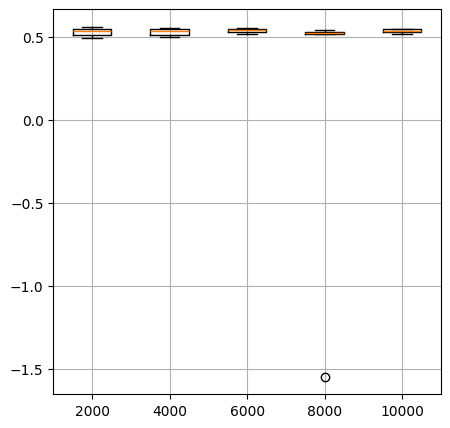

In [9]:
plt.figure(figsize=(5, 5))
plt.boxplot(scores[:5], labels=test_sizes[:5])
plt.grid()
plt.show()

In [10]:
model = LinearRegression()
model.fit?

Signature: model.fit(X, y, sample_weight=None)
Docstring:
Fit linear model.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training data.

y : array-like of shape (n_samples,) or (n_samples, n_targets)
    Target values. Will be cast to X's dtype if necessary.

sample_weight : array-like of shape (n_samples,), default=None
    Individual weights for each sample.

    .. versionadded:: 0.17
       parameter *sample_weight* support to LinearRegression.

Returns
-------
self : object
    Fitted Estimator.
File:      c:\users\mlempicki\ai_ml\venv\lib\site-packages\sklearn\linear_model\_base.py
Type:      method

Wariant 2 - dane treningowe całkiem usztywnione (czyli model też - eksperyment z jednym nauczonym modelem).

In [11]:
train_size = 10000
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
model = LinearRegression()
model.fit(X_train, y_train)


def generate_scores(model, X, y, test_size, num_trials):
    scores = []
    for _ in range(num_trials):
        _, X_test_sample, _, y_test_sample = train_test_split(X, y, test_size=test_size)
        y_pred = model.predict(X_test_sample)
        scores.append(r2_score(y_test_sample, y_pred))
    return scores

test_size = 1000
generate_scores(model, X_test, y_test, test_size, num_trials)

[0.5218886099446998,
 0.5606820416590713,
 0.5632138311632983,
 0.5177958048956313,
 0.5332960805743802,
 0.5227882184406978,
 0.5552815253263599,
 0.5650849590500118,
 0.4753626558264109,
 0.5415182525122424]

Wariant 3 - usztywniona wielkość zbioru treningowe, ale konkretne obserwacje losowane w każdej iteracji eksperymentu.

In [12]:
# Ad 4.

test_size = 1000
scores = generate_scores(model, X_test, y_test, test_size, num_trials)
np.quantile(scores, q=[0.05, 0.95])

array([0.52347057, 0.583218  ])

In [13]:
test_size = 10000
scores = generate_scores(model, X_test, y_test, test_size, num_trials)
np.quantile(scores, q=[0.05, 0.95])
# ze względu na duże zazębianie się próbek, szacowanie nie jest dokładne - realnie przedział powinien być większy

array([0.53905832, 0.54584131])

In [14]:
X_test.shape[0]

10640

# Skuteczność vs wielkość zbioru treningowego

Stwórz wykres jakości modelu ($r^2$ na zbiorze testowym) względem wielkości zbioru treningowego. Opracuj scenariusz eksperymentu, dobierz sposób wizualizacji.

Wygeneruj go wiele razy (bez ustawiania ziaren losowań). Czy obserwujesz coś dziwnego? Spróbuj wyjaśnić z czego to wynika.

In [15]:
def calculate_r2(X_test, y_test, X_train, y_train, train_size):
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=train_size)
    model = LinearRegression()
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

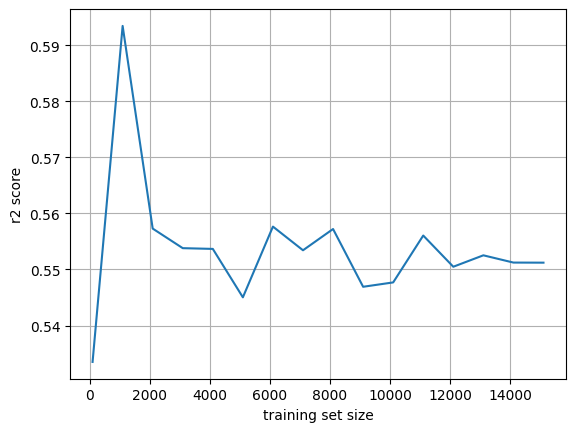

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000)

train_sizes = np.arange(100, X_train.shape[0], 1000)
scores = [calculate_r2(X_test, y_test, X_train, y_train, train_size) for train_size in train_sizes]

plt.plot(train_sizes, scores)
plt.xlabel("training set size")
plt.ylabel("r2 score")
plt.grid()
plt.show()

In [17]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [18]:
np.quantile(X.AveOccup, q=[0.95, 0.97, 0.99, 0.999])

array([ 4.33341667,  4.63587413,  5.39481203, 13.63044349])

In [19]:
X.quantile(q=0.99)

MedInc          10.596540
HouseAge        52.000000
AveRooms        10.357033
AveBedrms        2.127541
Population    5805.830000
AveOccup         5.394812
Name: 0.99, dtype: float64

In [20]:
quantile = 0.99
test_size = 1000

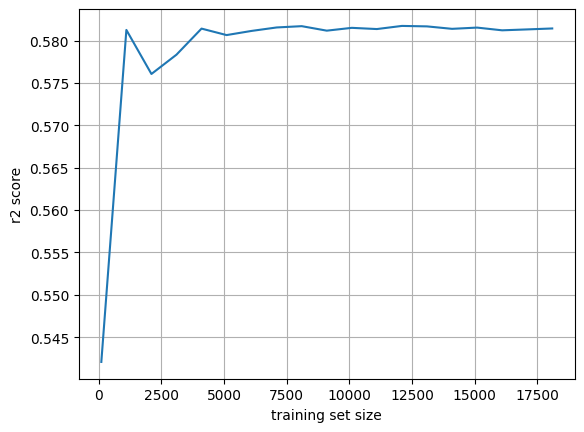

In [21]:
ind = (X <= X.quantile(quantile).values).all(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X[ind], y[ind], test_size=test_size)

train_sizes = np.arange(100, X_train.shape[0], 1000)
scores = [calculate_r2(X_test, y_test, X_train, y_train, train_size) for train_size in train_sizes]

plt.plot(train_sizes, scores)
plt.xlabel("training set size")
plt.ylabel("r2 score")
plt.grid()
plt.show()

In [22]:
ind.mean()

np.float64(0.9594961240310077)

In [23]:
ind = (X <= X.quantile(quantile).values).all(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X[ind], y[ind], test_size=test_size)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
y.min(), y.max()

(np.float64(0.14999), np.float64(5.00001))

In [25]:
y_pred.min(), y_pred.max()

(np.float64(-0.08523388515809294), np.float64(5.8109224934648624))

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# y_pred.min(), y_pred.max()

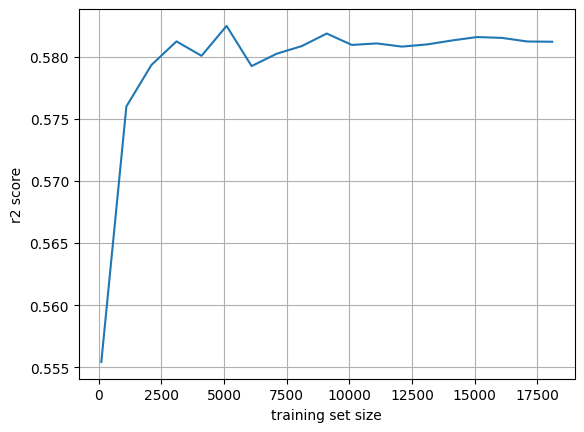

In [27]:
def calculate_r2(X_test, y_test, X_train, y_train, train_size):
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=train_size)
    model = LinearRegression()
    model.fit(X_train_sample, y_train_sample)
    y_pred = np.clip(model.predict(X_test), 0, 5)
    return r2_score(y_test, y_pred)

ind = (X <= X.quantile(quantile).values).all(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X[ind], y[ind], test_size=test_size)

train_sizes = np.arange(100, X_train.shape[0], 1000)
scores = [calculate_r2(X_test, y_test, X_train, y_train, train_size) for train_size in train_sizes]

plt.plot(train_sizes, scores)
plt.xlabel("training set size")
plt.ylabel("r2 score")
plt.grid()
plt.show()

In [28]:
3**8

6561

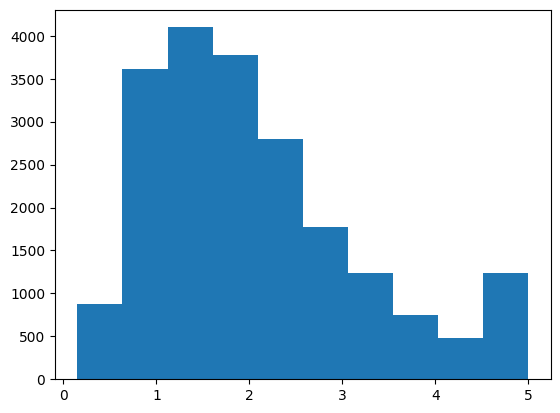

In [29]:
plt.hist(y)
plt.show()

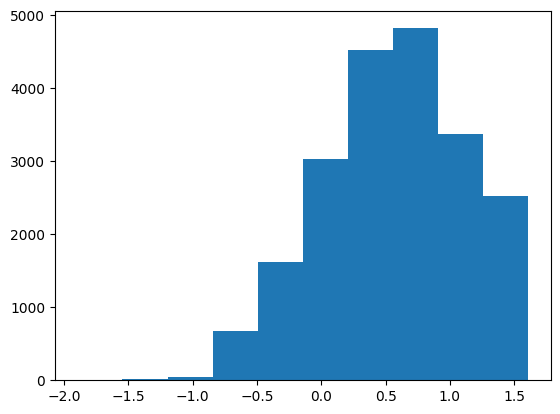

In [30]:
plt.hist(np.log(y))
plt.show()

In [31]:
from sklearn.compose import TransformedTargetRegressor
?TransformedTargetRegressor

Init signature:
TransformedTargetRegressor(
    regressor=None,
    *,
    transformer=None,
    func=None,
    inverse_func=None,
    check_inverse=True,
)
Docstring:     
Meta-estimator to regress on a transformed target.

Useful for applying a non-linear transformation to the target `y` in
regression problems. This transformation can be given as a Transformer
such as the :class:`~sklearn.preprocessing.QuantileTransformer` or as a
function and its inverse such as `np.log` and `np.exp`.

The computation during :meth:`fit` is::

    regressor.fit(X, func(y))

or::

    regressor.fit(X, transformer.transform(y))

The computation during :meth:`predict` is::

    inverse_func(regressor.predict(X))

or::

    transformer.inverse_transform(regressor.predict(X))

Read more in the :ref:`User Guide <transformed_target_regressor>`.

.. versionadded:: 0.20

Parameters
----------
regressor : object, default=None
    Regressor object such as derived from
    :class:`~sklearn.base.RegressorMixin`. 

In [32]:
regressor = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
regressor.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [33]:
regressor.predict(X_test)

array([ 1.93294047,  1.99146138,  1.44816302,  1.06583794,  1.47898616,
        2.08162708,  1.6331706 ,  1.87940359,  1.11017829,  1.78936063,
        1.17745771,  1.63158672,  1.98709958,  0.72275889,  1.01810118,
        0.62896724,  1.73787882,  1.68979816,  1.43384935,  1.22425768,
        1.09519078,  5.15310737,  9.45430346,  2.24258561,  0.64268828,
        1.36610876,  1.78390596,  1.93361816,  1.60219686,  1.14938229,
        2.4726483 ,  1.75118717,  2.53176979,  2.50414246,  6.3461827 ,
        1.52788411,  1.31397285,  1.80409976,  1.48942149,  0.64159717,
        1.59495197,  2.08216076,  1.94449445,  0.97698887,  2.39522351,
        2.56773138,  2.88718194,  1.07077821,  1.76627708,  2.36838808,
        1.24775784,  2.01650634,  1.85814576,  4.63048703,  1.4396802 ,
        1.33181167,  2.98969359,  1.3669123 ,  1.38023713,  0.99578905,
        2.82600448,  2.31325584,  1.19756394,  1.83118263,  1.28844247,
       18.94558995,  1.94297451,  1.47419756,  1.22566487,  2.12

# Transformacje zmiennej celu i automatyzacja eksperymentów

Zaimplementuj testy modelu regresji liniowej z różnymi transformacjami zmiennej celu (w zestawieniu uwzględnij też model bez transformacji). Użyj klasy `TranformedTargetRegressor` z modulu `sklearn.compose`. Nie używaj klasy `GridSearchCV`. Zaimplementuj funkcję, która zwróci tabelkę z wynikami testów - informacją jakie przekształcenia dało jakie wyniki (metryka r-kwadrat), a arguemntem będzie lista transformacji do rozważenia (+ inne konieczne zmienne).

Zaimplementuj testy tak, aby rozszerzanie ich o inne transformacje wymagało minimalnego nakładu pracy.

In [34]:
def test_transformation(transform_func, inverse_func, X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = TransformedTargetRegressor(LinearRegression(), 
                                       func=transform_func, 
                                       inverse_func=inverse_func)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return {
        'transform_func': transform_func,
        'inverse_func': inverse_func,
        'r2': r2
    }

def test_transformations(transformations: list[tuple], X, y):
    return [test_transformation(transformation[0], transformation[1], X, y) for transformation in transformations]

# bład metodologiczny: podział powinien być raz przed testami


In [35]:
test_transformations(
    [(None, None), (np.log, np.exp),(np.sqrt, np.square)],
     X,
     y
)

[{'transform_func': None, 'inverse_func': None, 'r2': 0.5310266422984055},
 {'transform_func': <ufunc 'log'>,
  'inverse_func': <ufunc 'exp'>,
  'r2': -0.3764588107716398},
 {'transform_func': <ufunc 'sqrt'>,
  'inverse_func': <ufunc 'square'>,
  'r2': 0.46754356217002535}]

In [36]:
def test_transformation(transform_func, inverse_func, X_train, X_test, y_train, y_test):

    model = TransformedTargetRegressor(LinearRegression(), func=transform_func, inverse_func=inverse_func)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return {
        'transform_func': "identity" if transform_func is None else transform_func.__name__,
        'inverse_func': "identity" if inverse_func is None else inverse_func.__name__,
        'r2': r2

    }

def test_transformations(transformations: list[tuple], X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    results = pd.DataFrame([test_transformation(transformation[0], transformation[1], X_train, X_test, y_train, y_test) for transformation in transformations])
    return results

In [37]:
results = test_transformations(
    [(None, None), (np.log, np.exp),(np.sqrt, np.square)],
     X,
     y
)
results

,transform_func,inverse_func,r2
0,identity,identity,0.540977
1,log,exp,-0.429316
2,sqrt,square,0.459366


In [38]:
target_transformations = [(None, None), (np.log, np.exp),(np.sqrt, np.square)]
target_transformations = [{"func": func, "inverse_func": inverse_func} for func, inverse_func in target_transformations]
target_transformations

[{'func': None, 'inverse_func': None},
 {'func': <ufunc 'log'>, 'inverse_func': <ufunc 'exp'>},
 {'func': <ufunc 'sqrt'>, 'inverse_func': <ufunc 'square'>}]

In [39]:
def test_transformation(transformation, X_train, X_test, y_train, y_test):

    model = TransformedTargetRegressor(LinearRegression(), 
                                       func=transformation["func"], 
                                       inverse_func=transformation["inverse_func"])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return {
        'transform_func': "identity" if  transformation["func"] is None else transformation["func"].__name__,
        'inverse_func': "identity" if transformation["inverse_func"] is None else transformation["inverse_func"].__name__,
        'r2': r2
    }

def test_transformations(transformations: list[dict], X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    results = pd.DataFrame([test_transformation(transformation, X_train, X_test, y_train, y_test) for transformation in transformations])
    return results

test_transformations(target_transformations, X, y)

,transform_func,inverse_func,r2
0,identity,identity,0.543821
1,log,exp,-0.141305
2,sqrt,square,0.482027


In [40]:
def test_transformations(transformations: list[dict], X_train, X_test, y_train, y_test):
    results = pd.DataFrame([test_transformation(transformation, X_train, X_test, y_train, y_test) for transformation in transformations])
    return results


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
test_transformations(target_transformations, X_train, X_test, y_train, y_test)

,transform_func,inverse_func,r2
0,identity,identity,0.523702
1,log,exp,-0.498601
2,sqrt,square,0.433765


In [41]:
MIN_PRED, MAX_PRED = 0, 5

target_transformations = [
    (None, None), 
    (np.log, np.exp),
    (np.sqrt, np.square), 
    (lambda x: x, lambda y: np.clip(y, MIN_PRED, MAX_PRED)),
    (np.log, lambda x: np.clip(np.exp(x), MIN_PRED, MAX_PRED)),
]

target_transformations = [{"func": func, "inverse_func": inverse_func} for func, inverse_func in target_transformations]


test_transformations(target_transformations, X_train, X_test, y_train, y_test)

C:\Users\mlempicki\AI_ML\venv\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(
C:\Users\mlempicki\AI_ML\venv\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:202: UserWarning: The provided functions are not strictly inverse of each other. If you are sure you want to proceed regardless, set 'check_inverse=False'.
  warnings.warn(


,transform_func,inverse_func,r2
0,identity,identity,0.523702
1,log,exp,-0.498601
2,sqrt,square,0.433765
3,<lambda>,<lambda>,0.548838
4,log,<lambda>,0.498682


In [42]:
def exp_clipped(x):
    return np.clip(np.exp(x), MIN_PRED, MAX_PRED)

target_transformations = [
    (None, None), 
    (np.log, np.exp),
    (np.sqrt, np.square), 
    (lambda x: x, lambda y: np.clip(y, MIN_PRED, MAX_PRED)),
    (np.log, lambda x: np.clip(np.exp(x), MIN_PRED, MAX_PRED)),
    (np.log, exp_clipped),
]

In [43]:
def convert_to_clipped(f):
    def f_clipped(x):
        y = f(x)
        y_clipped = np.clip(y, MIN_PRED, MAX_PRED)
        return y_clipped
    return f_clipped

In [44]:
target_transformations = [
    (None, None), 
    (np.log, np.exp),
    (np.sqrt, np.square), 
    (lambda x: x, lambda y: np.clip(y, MIN_PRED, MAX_PRED)),
    (np.log, lambda x: np.clip(np.exp(x), MIN_PRED, MAX_PRED)),
    (np.log, exp_clipped),
    (np.log, convert_to_clipped(np.exp)),
    (np.sqrt, convert_to_clipped(np.square)),
]